In [448]:
# magic
from IPython.display import Image
%matplotlib inline

In [450]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [451]:
# 1. Get data

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Other 2 columns 
y = iris.target
X, y

#Number of classes 
print("Class labels", np.unique(y))

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# print("X train {} \n X test {} \n y train {} \n y test {}".format(X_train, X_test, y_train, y_test))
print("X size {}".format(X.shape))

In [453]:
# 2. Standardize the features

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# print("X {} X std {}".format(X_train[:2], X_train_std[:2]))

In [454]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [455]:
y_pred = ppn.predict(X_test_std)

error = (y_test != y_pred).sum()
error

4

In [456]:
from sklearn.metrics import accuracy_score

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))

Accuracy 0.9111111111111111


No handles with labels found to put in legend.


X com <class 'tuple'> y com <class 'tuple'>
X com (150, 2) y com (150,)
xx1 (67575,) xx2 (255, 265) array [[-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]
 [-2.4487218  -2.4487218  -2.4487218  ...  2.6312782   2.6312782
   2.6312782 ]] 
 size (2, 67575) after t [[-2.57496421 -2.4487218 ]
 [-2.55496421 -2.4487218 ]
 [-2.53496421 -2.4487218 ]
 ...
 [ 2.66503579  2.6312782 ]
 [ 2.68503579  2.6312782 ]
 [ 2.70503579  2.6312782 ]]


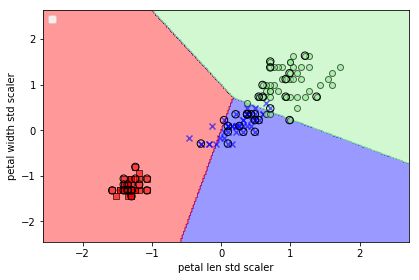

In [457]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, v.split("."))) # convert to int


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    np_array = np.array([xx1.ravel(), xx2.ravel()])
    np_array_t = np.array([xx1.ravel(), xx2.ravel()]).T
    
    print("xx1 {} xx2 {} array {} \n size {} after t {}".format((xx1.ravel()).shape, xx2.shape, np_array, np_array.shape, np_array_t))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # End of plot contour
    
    #for each class, plot the points : SImply plots the point
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.6,
                        c=cmap(idx),
                        edgecolor='black',
                        marker=markers[idx],
                        label=cl)
        
        
    # Test points shown in diff colour
    
    if test_idx:
        # print("X size {} ".format(X.shape))
        X_test, y_test = X[test_idx, :], y[test_idx]
        # print("X_test {} y_test {}".format(X_test, y_test))
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, edgecolors='black', linewidths=1, marker='o', s=55, label='test set')


No handles with labels found to put in legend.


X com <class 'tuple'> y com <class 'tuple'>
X com (150, 2) y com (150,)
xx1 (67575,) xx2 (255, 265) array [[-2.57496421 -2.55496421 -2.53496421 ...  2.66503579  2.68503579
   2.70503579]
 [-2.4487218  -2.4487218  -2.4487218  ...  2.6312782   2.6312782
   2.6312782 ]] 
 size (2, 67575) after t [[-2.57496421 -2.4487218 ]
 [-2.55496421 -2.4487218 ]
 [-2.53496421 -2.4487218 ]
 ...
 [ 2.66503579  2.6312782 ]
 [ 2.68503579  2.6312782 ]
 [ 2.70503579  2.6312782 ]]


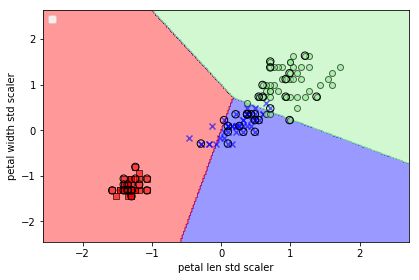

In [458]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print("X com {} y com {}".format(type(X_combined_std.shape), type(y_combined.shape)))
print("X com {} y com {}".format(X_combined_std.shape, y_combined.shape))

plot_decision_regions(X_combined_std, y_combined, ppn, test_idx=range(105, 150))

plt.xlabel('petal len std scaler')
plt.ylabel('petal width std scaler')
plt.legend(loc='upper left')


plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

plt.show()

In [459]:
#-> np

a = np.arange(1,5)
b = np.arange(6,10)
a, b

c = np.array([a, b])
c

c.shape


(2, 4)